In [9]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.ticker as ticker
import xarray as xr
import salem
from salem import *
import oggm
from oggm import cfg, utils, workflow, tasks, graphics
    
    
path = '/home/pelto/oggm_runs/products_opt/'
glacier = ['Kokanee', 'Haig', 'Conrad', 'Washmawapta', 'Illecillewaet', 'Nordic', 'Zillmer']


In [10]:
# ds = xr.open_dataset(path + glacier[num] + '/' + glacier[num] + '101sw_ME_optimized.nc')

# ds.attrs['pyproj_srs'] = ds.attrs['proj_srs'] #could try grid.proj
# ds

In [11]:
# sm = ds.salem.get_map(cmap='viridis')
# sm.set_data(ds.distributed_thickness)
# sm.set_scale_bar()
# sm.set_lonlat_contours(interval=0)
# sm.visualize() #ax=ax1, title='SRTM 90m'


In [12]:
# fig, axarr = plt.subplots(2, 4, sharey=False, sharex=False, figsize=(7,3.5))#(12, 6))
# j, k = 0, 0

# for name in glacier:
    
#     ds = xr.open_dataset(path + glacier[num] + '/' + glacier[num] + '_optimized.nc') #101sw_ME
#     axarr[j,k].plot(ds.distributed_thickness);
#     num+=1
#     k += 1

#     if num == 3: #changed to 2, 1 worked for 2x2 panel plot
#         j += 1
#         k = 0

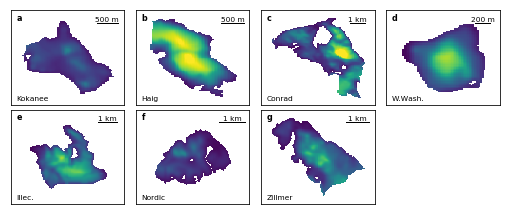

In [15]:
num = 0
font = {'family' : 'Helvetica',  'weight' : 'normal',
        'size'   : 7.5}
glac = ['Kokanee', 'Haig', 'Conrad', 'W.Wash.', 'Illec.', 'Nordic', 'Zillmer']
plt.rc('font', **font)
letter=['a', 'b', 'c', 'd', 'e', 'f', 'g']
pylab.rcParams['xtick.major.pad']='2'
pylab.rcParams['ytick.major.pad']='2'


fig, ((ax, ax1, ax2, ax3), (ax4, ax5, ax6, ax7))  = plt.subplots(2, 4, sharey=False, sharex=False, figsize=(7,2.75))#(12, 6))
axes = [ax, ax1, ax2, ax3, ax4, ax5, ax6, ax7]

for name in glacier:
    
    ds = xr.open_dataset(path + glacier[num] + '/' + glacier[num] + '101sw_MAE_optimized.nc') #101sw_ME
    ds.attrs['pyproj_srs'] = ds.attrs['proj_srs'] #could try grid.proj
    sm = ds.salem.get_map(cmap='viridis', vmin=0, vmax=250)#, vmax=250)
#     sm.append_colorbar(axes[num], pad=0.01)
#     salem.DataLevels.colorbarbase(ds, ax=axes[num])
    
#     DataLevels.append_colorbar(pad=0.05)
    sm.set_data(ds.distributed_thickness)
    
    # add letter to plots
    axes[num].text(0.05, 0.89, letter[num], transform=axes[num].transAxes, fontweight='bold', fontsize=8)
    axes[num].text(0.05, 0.05, glac[num], transform=axes[num].transAxes)
        
    #plot shapefile
#     shpf = '/home/pelto/GIS/outlines/ice_thick_glaciers.shp'
#     gdf = salem.read_shapefile(shpf)
#     sm.set_shapefile(gdf, linewidth=1)
   
    sm.set_scale_bar(location=(0.85, 0.87),linewidth=1) #fontsize=17)
    sm.set_lonlat_contours(interval=0)
#     cbar =sm.append_colorbar(ax=axes[7]) 
    Q = sm.visualize(ax=axes[num], addcbar=False) #ax=ax1, title='SRTM 90m'
    # DataLevel draws the colorbar
    axes[num].set_aspect('auto')
   
    ax7.axis('off')

#     axarr[j,k].plot(ds.distributed_thickness);
    num+=1

# cb_ax = fig.add_axes([0.85, 0.06, 0.02, 0.42]) 
# cbar = fig.colorbar(Q, cax=cb_ax, label='Ice thickness (m)')
plt.subplots_adjust(bottom=0.01, top=0.99, left=0.01, right=0.98, wspace=0.1, hspace=0.05) 
# plt.tight_layout()
plt.savefig('/home/pelto/Desktop/ice_thick/JoG/dist_thick_opt_TST.pdf', dpi=300)

7

In [ ]:
# ds.coords['x'] = ds.coords['x']
# ds.coords['x'] = ds.coords['x'] + 484752.76
# ds.proj_srs